<a class="anchor" id="section-0"></a>
<img src="https://i.imgur.com/lTCPbz0.jpeg" alt='logo puc-sp' width='30%' align='left'>

### Pontifícia Universidade Católica de São Paulo (PUC-SP)

<h1 style=font-size:30px>Calculing Deforestation By Using Satellite Images</h1>


### Bacharelado em Ciência de Dados e Inteligência Artificial

#### Turma: CDIA21-MA

**Professor:** Rooney Ribeiro Albuquerque

**Alunos:**

<table align="left" style=font-size:15px>
<thead>
  <tr>
    <th style="text-align:left;">Nome</th>
    <th style="text-align:left;">RA</th>
    <th></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align:left;">Carlos Eduardo de Oliveira</td>
    <td>RA00297792</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Gustavo Schlieper Tessitore</td>
    <td>RA00297844</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Isaac Higuchi</td>
    <td>RA00306191</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">João Pedro Taves Araujo</td>
    <td>RA00297753</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Lucas Lopes Amorim</td>
    <td>RA00303799</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Thiago de Jesus Carvalho</td>
    <td>RA00297767</td>
    <td></td>
  </tr>
</tbody>
</table>

### REGIÃO COLETADA

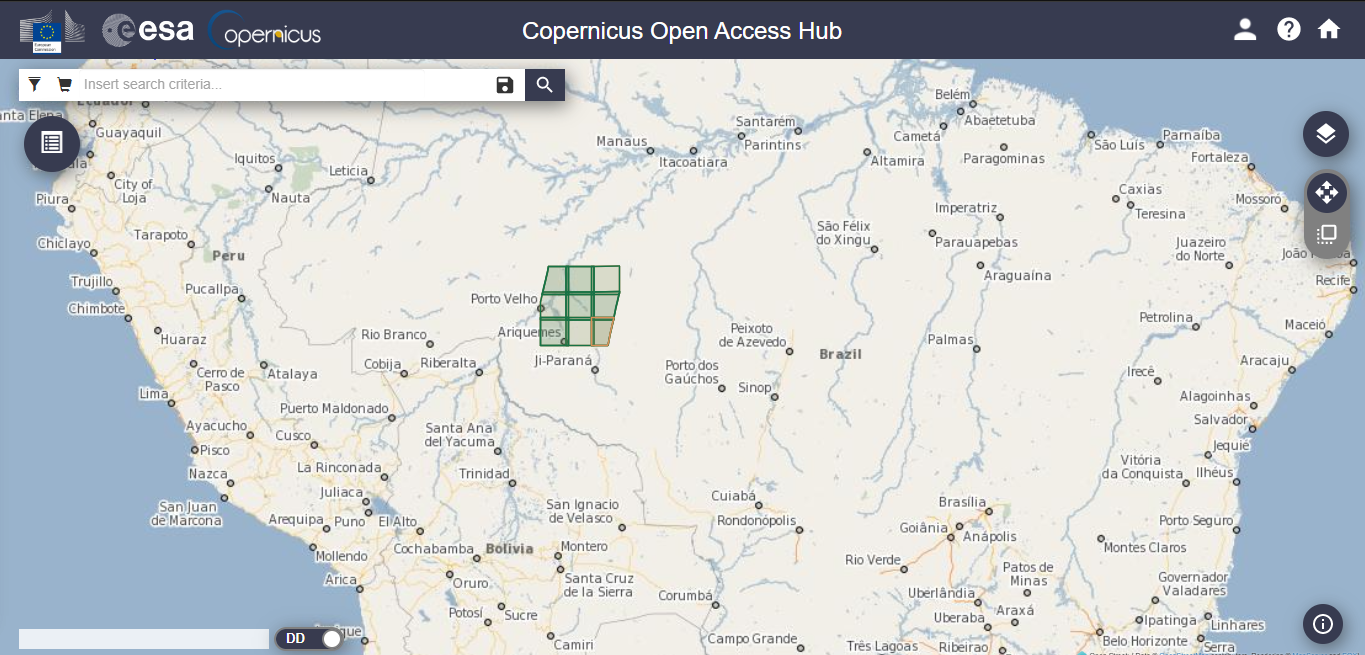

In [57]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import pandas as pd

C:\Users\lucas\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [29]:
jun_image_path = './data/JUL2021/'
band2 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B02_60m.jp2', driver='JP2OpenJPEG') #green 
band3 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B03_60m.jp2', driver='JP2OpenJPEG') #blue
band4 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B04_60m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B8A_60m.jp2', driver='JP2OpenJPEG') #nir

In [30]:
jun_image_path = './data/JUL2021/'
band2 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B02_60m.jp2', driver='JP2OpenJPEG') #green 
band3 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B03_60m.jp2', driver='JP2OpenJPEG') #blue
band4 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B04_60m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B8A_60m.jp2', driver='JP2OpenJPEG') #nir

In [31]:
# print(band4.count)
# print(band4.width)
# print(band4.height)
# print(band4.dtypes)

In [32]:
# plot.show(band4)

In [33]:
#converting a matriz array into a rasterio
# band4.transform

### Different bands in color map

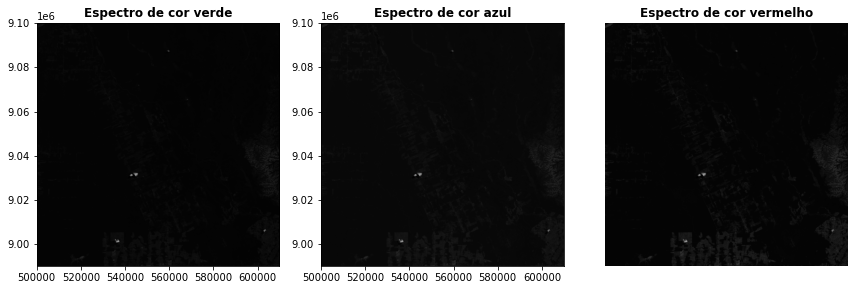

In [34]:
#different bands in colormap
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
plot.show(band2, ax=ax1, cmap='gray', title='Espectro de cor verde')
plot.show(band3, ax=ax2, cmap='gray', title='Espectro de cor azul')
plot.show(band4, ax=ax3, cmap='gray', title='Espectro de cor vermelho')
fig.tight_layout()
plt.axis('off');

### Create NDVI 
Calculating Normalized Difference Vegetation Index (NDVI) is an important indicator to assess the presence/absence of green vegetation from the satellite images. To calculate the NDVI, you need Red band and Near-Infrared Band (NIR). Different satellite images assign different numbers for this band. Sentinel Images have red in 4th band and NIR in the 8th band. The formula for NDVI calculation is:
nir - red /(nir + red).

To carry out this in Rasterio we need first to read the 4th and 8th bands as arrays. We also need to make sure that the arrays are floats.

##### IMAGES JUL/2021 - NDVI

In [35]:
red = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B04_60m.jp2', driver='JP2OpenJPEG').read() #BAND4
nir = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B8A_60m.jp2', driver='JP2OpenJPEG').read() #BAND8

In [36]:
def ndvi_result(red_value, nir_value):
    return (nir_value.astype(float)-red_value.astype(float))/(nir_value+red_value)

In [37]:
def ndvi_plot(red_value, nir_value, save_path=''):
    ndvi = (nir_value.astype(float)-red_value.astype(float))/(nir_value+red_value)
    
    fig, ax = plt.subplots(1)
    ax.axis('off')
    ax.set_frame_on(False)
    if save_path:
        fig.savefig(save_path)
    plot.show(ndvi, ax=ax)

In [38]:
ndvi_result(red, nir)

array([[[0.89815818, 0.89736701, 0.89374817, ..., 0.90206813,
         0.89448108, 0.87858347],
        [0.88078237, 0.89157631, 0.89598893, ..., 0.9069475 ,
         0.89048811, 0.89496718],
        [0.89419898, 0.88058806, 0.88017366, ..., 0.89835361,
         0.88443616, 0.89694149],
        ...,
        [0.87867759, 0.88440025, 0.88881356, ..., 0.7554559 ,
         0.65838926, 0.70205237],
        [0.88421386, 0.8902439 , 0.89047915, ..., 0.88138686,
         0.8746406 , 0.87764706],
        [0.887078  , 0.89013813, 0.88211788, ..., 0.8870411 ,
         0.88740741, 0.88871122]]])

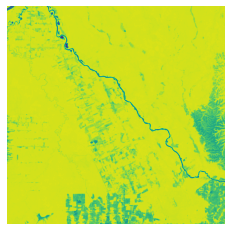

In [39]:
n = ndvi_plot(red, nir)

##### IMAGES NOV/2022 - NDVI

In [40]:
nov_images_path = "./data/NOV2022/"
band2 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B02_60m.jp2', driver='JP2OpenJPEG') #green
band3 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B03_60m.jp2', driver='JP2OpenJPEG') #blue
band4 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B04_60m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B8A_60m.jp2', driver='JP2OpenJPEG') #nir

In [41]:
red_nov = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B04_60m.jp2', driver='JP2OpenJPEG').read() #BAND4
nir_nov = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B8A_60m.jp2', driver='JP2OpenJPEG').read() #BAND8

In [42]:
ndvi_result(red_nov, nir_nov)

array([[[0.59819141, 0.61800662, 0.60130816, ..., 0.59618233,
         0.56646579, 0.57574711],
        [0.59250868, 0.59830994, 0.61412175, ..., 0.57682884,
         0.5689415 , 0.58613728],
        [0.58889582, 0.57751331, 0.58431005, ..., 0.57426941,
         0.5546277 , 0.57720207],
        ...,
        [0.55548139, 0.57131346, 0.53893866, ..., 0.53030303,
         0.50974026, 0.48871182],
        [0.54832181, 0.54096141, 0.54896043, ..., 0.56292985,
         0.5610752 , 0.55789474],
        [0.54689851, 0.52397498, 0.5308255 , ..., 0.5679702 ,
         0.59076331, 0.55727821]]])

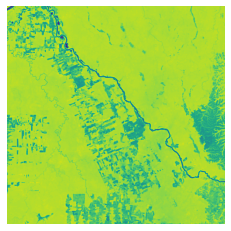

In [43]:
ndvi_plot(red_nov, nir_nov)

### K-Means with OpenCV

O OpenCV fornece a função cv2.kmeans(amostras, nclusters(K), critérios, numero_tentativas, sinalizadores) para agrupamento de cores. 


Os critérios são definidos como tipo, número máximo de iterações e epsilon (precisão). 
Os tipos podem ser cv.TERM_CRITERIA_EPS (interrompe a iteração do algoritmo se a precisão especificada, epsilon, for atingida), 
cv.TERM_CRITERIA_MAX_ITER (interrompe o algoritmo após o número especificado de iterações, max_iter) ou as duas juntas (interrompe a iteração quando alguma das condições for atendida). 


Os sinalizadores podem ser cv.KMEANS_PP_CENTERS ou cv.KMEANS_RANDOM_CENTERS.

In [44]:
#reading the image
img2021 = cv2.imread('./rasterio_imgs_kmeans/jul2021_SEMBORDA.jpg')
img2022 = cv2.imread('rasterio_imgs_kmeans/nov2022_SEMBORDA.jpg')

In [45]:
#change color to RGB
img2021 = cv2.cvtColor(img2021, cv2.COLOR_BGR2RGB)
img2022 = cv2.cvtColor(img2022, cv2.COLOR_BGR2RGB)

In [46]:
def plot_opencv_kmeans(img, n_clusters, title=''):
    # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
    img = img.reshape((-1,3))

    # Convert to float type to use the algorithm 
    img = np.float32(img)

    #KMEANS
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
    k = n_clusters
    retval, labels, centers = cv2.kmeans(img, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # convert data into 8-bit values
    centers = np.uint8(centers)
    centers_segmented_data = centers[labels.flatten()]

    # reshape data into the original image dimensions
    segmented_image = centers_segmented_data.reshape((img2021.shape))
    
    plt.figure(dpi=150)
    if title:
        plt.title(title)
    plt.axis('off')
    plt.imshow(segmented_image)
    
    plt.figure()
    plt.title('Paleta de cores')
    unique_rows = np.unique(centers_segmented_data, axis=0)
    plt.imshow(unique_rows.reshape(1, n_clusters, 3));
    plt.axis('off');
    
    return centers_segmented_data, unique_rows

In [47]:
n_clusters = 2

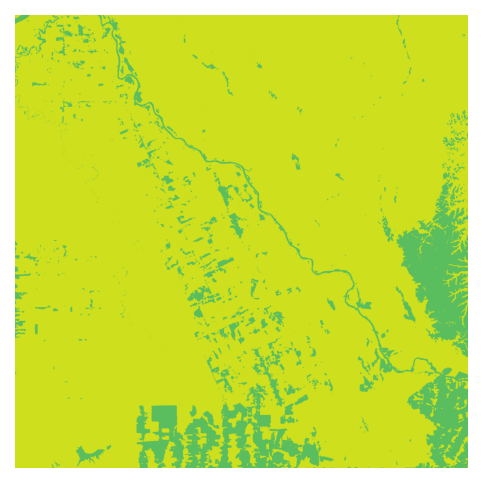

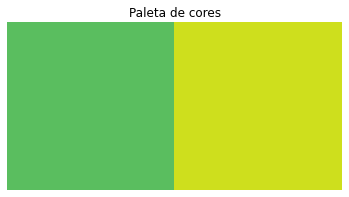

In [48]:
s_2021, unique_colors_2021 = plot_opencv_kmeans(img2021, n_clusters)

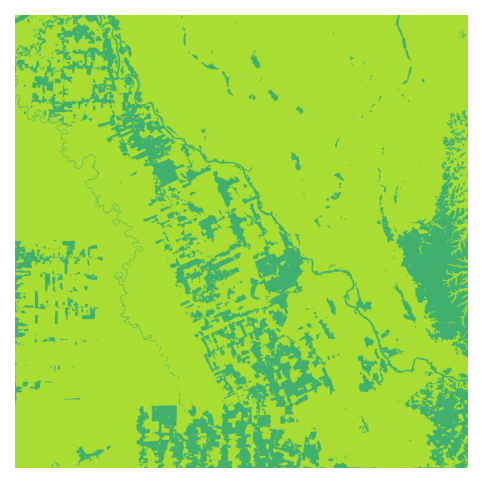

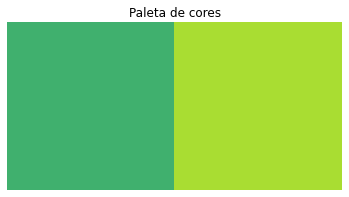

In [49]:
s_2022, unique_colors_2022 = plot_opencv_kmeans(img2022, n_clusters)

In [50]:
df2021 = pd.DataFrame(s_2021)
df2022 = pd.DataFrame(s_2022)

In [54]:
s_2021_str = (df2021[0].astype(str) + '_' + df2021[1].astype(str) + '_' + df2021[2].astype(str))
vc_2021 = s_2021_str.value_counts() / len(s_2021_str)
vc_2021

206_223_29    0.88111
90_190_95     0.11889
dtype: float64

In [55]:
s_2022_str = (df2022[0].astype(str) + '_' + df2022[1].astype(str) + '_' + df2022[2].astype(str))
vc_2022 = s_2022_str.value_counts() / len(s_2022_str)
vc_2022

169_221_50    0.807432
64_176_110    0.192568
dtype: float64

In [67]:
var_perc = round((vc_2021.max() - vc_2022.max()), 4)

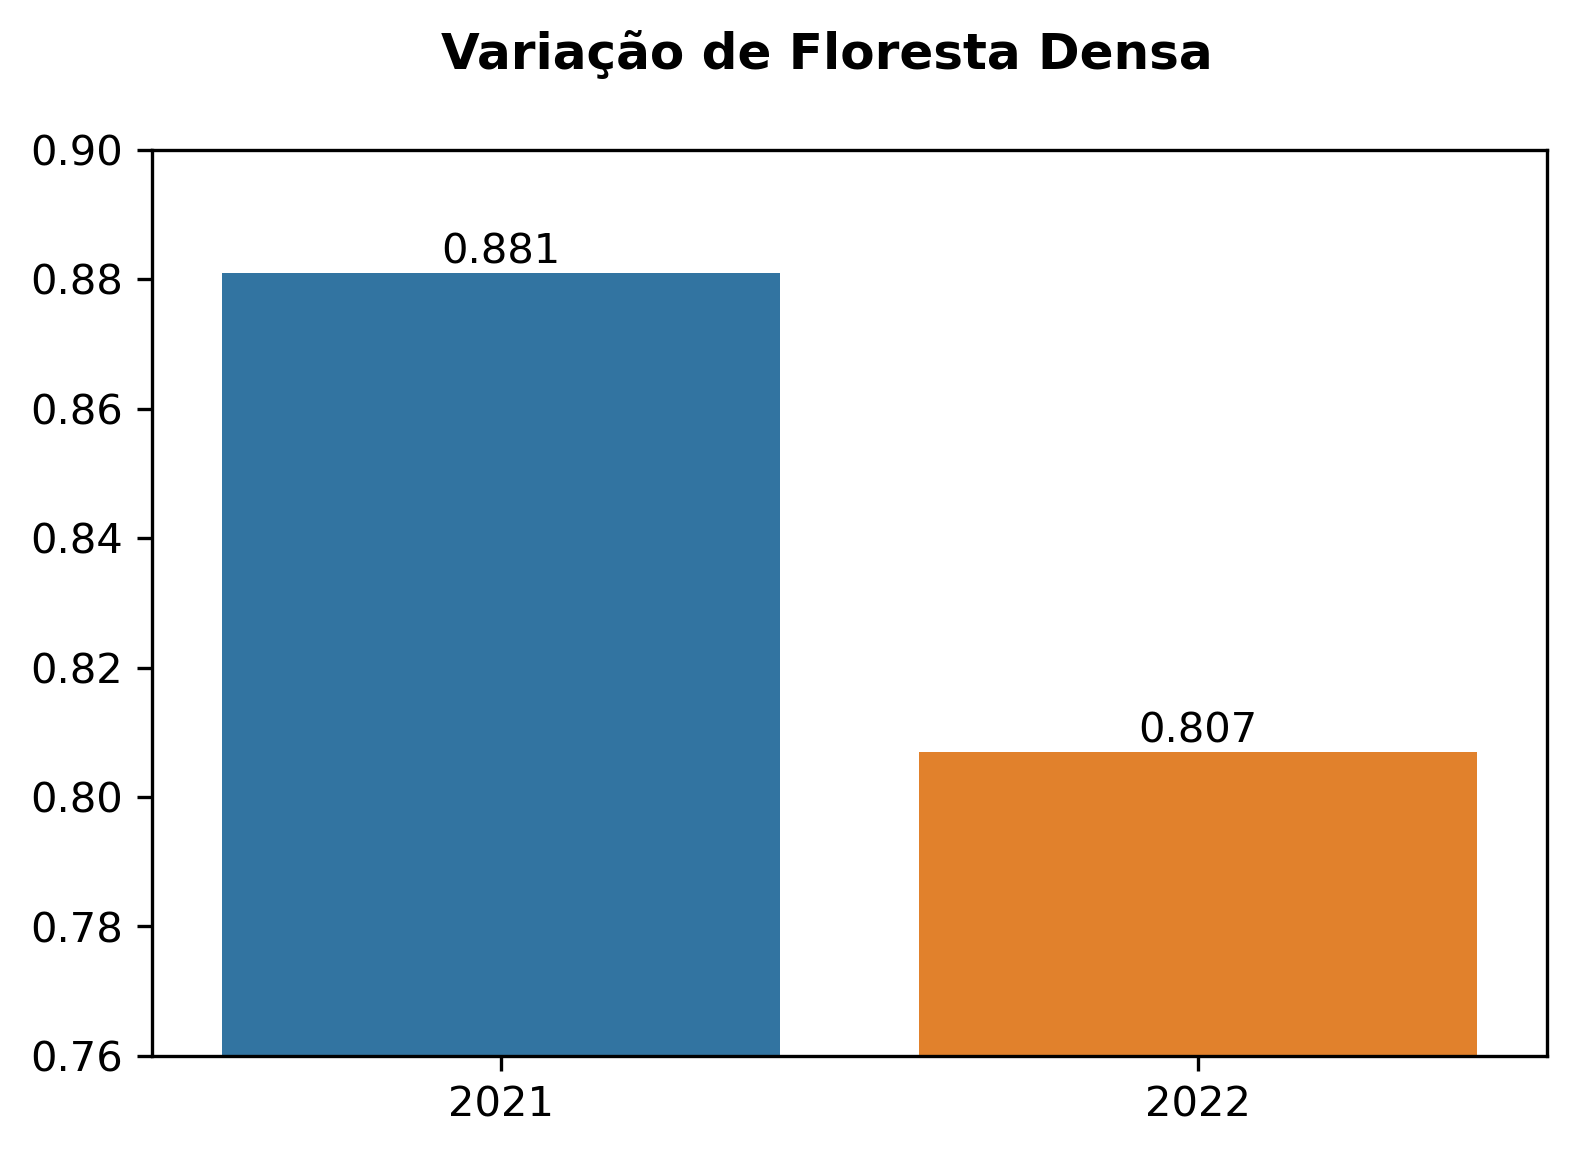

In [68]:
data = {'ano': [2021, 2022], 'Percentual de Floresta Densa': [vc_2021.round(3).max(), vc_2022.round(3).max()]}
plt.figure(dpi=300)
ax = sns.barplot(data=data, x='ano', y='Percentual de Floresta Densa')
for i in ax.containers:
    ax.bar_label(i, fontsize=10)
plt.ylim(0.76, 0.9)
plt.suptitle('Variação de Floresta Densa', weight='bold')
plt.show()

In [53]:
round((vc_2021.max() - vc_2022.max()), 4)

0.0737

<h1 style=font-size:90px;text-align:center>7,36%</h1>
<p style=font-size:50px;text-align:center>esse foi o aumento no desmatamento</p>

In [ ]:
plt.figure()
plt.barplot(x=[1,2])

OBS: 

Both images (2021 and 2022) are pretty similar than the NDVI plot (without the algorithm). Basically, only the color of the river is gone.

In other words, the NDVI plot image has approximately 4 colors.